## Error analysis

In [1]:
# Load data
import pandas as pd
df_pred = pd.read_csv('emotion_data_merged_4_predicted.csv')

In [2]:
df_pred.head()

,sentence,emotion,predicted_class
0,im feeling rather rotten so im not very ambiti...,sadness,4
1,im updating my blog because i feel shitty,sadness,4
2,i never make her separate from me because i do...,sadness,4
3,i left with my bouquet of red and yellow tulip...,happiness,3
4,i was feeling a little vain when i did this one,sadness,4


In [3]:
df_pred.shape

(661513, 3)

In [4]:
# Drop the rows with missing values
df_pred = df_pred.dropna()

In [5]:
# Delete the rows with the emotion 'neutral'
df_pred = df_pred[df_pred['emotion'] != 'neutral']

In [6]:
df_pred['emotion'].unique()

array(['sadness', 'happiness', 'fear', 'anger', 'surprise', 'disgust'],
      dtype=object)

In [7]:
df_pred['predicted_class'].unique()

array([4, 3, 2, 0, 5, 1])

In [8]:
df_pred['emotion'].value_counts()

emotion
happiness    190250
sadness      122251
anger         59703
surprise      55308
fear          44267
disgust        7361
Name: count, dtype: int64

In [9]:
# Define the mapping from emotion strings to numeric codes
emotion_mapping = {'anger': 0, 'disgust': 1, 'fear': 2, 'happiness': 3, 'sadness': 4, 'surprise': 5}

# Create the 'emotion_encoded' column by mapping the 'emotion' column using the emotion_mapping
df_pred['emotion_encoded'] = df_pred['emotion'].map(emotion_mapping)

df_pred.head()

,sentence,emotion,predicted_class,emotion_encoded
0,im feeling rather rotten so im not very ambiti...,sadness,4,4
1,im updating my blog because i feel shitty,sadness,4,4
2,i never make her separate from me because i do...,sadness,4,4
3,i left with my bouquet of red and yellow tulip...,happiness,3,3
4,i was feeling a little vain when i did this one,sadness,4,4


In [10]:
df_pred.shape

(479140, 4)

In [11]:
# Classification report
from sklearn.metrics import classification_report

report = classification_report(df_pred['emotion_encoded'], df_pred['predicted_class'])

print(report)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     59703
           1       0.94      0.98      0.96      7361
           2       0.95      0.99      0.97     44267
           3       1.00      0.99      0.99    190250
           4       1.00      0.98      0.99    122251
           5       0.98      0.99      0.98     55308

    accuracy                           0.99    479140
   macro avg       0.97      0.98      0.98    479140
weighted avg       0.99      0.99      0.99    479140



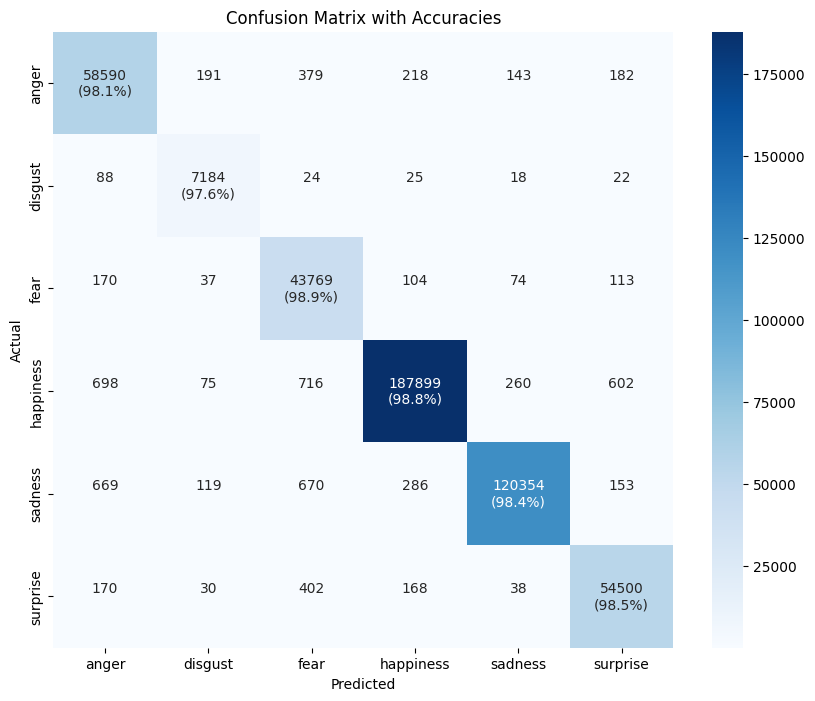

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(df_pred['emotion_encoded'], df_pred['predicted_class'])

# Define the original emotion names
emotion_names = {0: 'anger', 1: 'disgust', 2: 'fear', 3: 'happiness', 4: 'sadness', 5: 'surprise'}

# Create an annotated confusion matrix
cm_with_acc = cm.astype('str')  # Convert counts to string for annotation
for i in range(len(cm)):
    for j in range(len(cm[i])):
        # Append accuracy to the diagonal elements
        if i == j:
            cm_with_acc[i][j] = f"{cm[i][j]}\n({cm[i][j] / cm.sum(axis=1)[i] * 100:.1f}%)"
        else:
            cm_with_acc[i][j] += "\n "

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cm, annot=cm_with_acc, fmt='', ax=ax, cmap='Blues', 
            xticklabels=[emotion_names[i] for i in range(len(emotion_names))], 
            yticklabels=[emotion_names[i] for i in range(len(emotion_names))])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix with Accuracies')
plt.show()

In [13]:
# Emotion mapping
emotion_mapping = {0: 'anger', 1: 'disgust', 2: 'fear', 3: 'happiness', 4: 'sadness', 5: 'surprise'}
df_pred['predicted_class'] = df_pred['predicted_class'].replace(emotion_mapping)

In [14]:
# Disgust predicted as anger (full sentences)
# Iterate over misclassified indices and print corresponding sentences
misclassified_indices = df_pred[(df_pred['emotion'] == 'disgust') & (df_pred['predicted_class'] == 'anger')].index
for idx in misclassified_indices:
    print("Sentence:", df_pred['sentence'][idx])
    print()  # Add a newline for better readability

Sentence: Dullard! they cried, "that is only an old wooden shoe, and the upper part is missing into the bargain; are you going to give that also to the Princess?"

Sentence: What- what were you- were you pleased to ob- stammered he- and all the clerks wrote down, "pleased to ob-" "He is of no use!" said the Princess.

Sentence: 'You are talking too much,' said the tinder-box, and the steel struck against the flint till some sparks flew out, crying, 'We want a merry evening, don't we?'
52:52	N:N	N:N	'Yes, of course,' said the matches, 'let us talk about those who are the highest born.'

Sentence: 'I think it highly improper,' said the tea-kettle, who was kitchen singer, and half-brother to the tea-urn, 'that a rich foreign bird should be listened to here.
70:70	N:N	N:N	Is it patriotic?
71:71	N:N	N:N	Let the market-basket decide what is right.'
72:72	A:A	A:N	'I certainly am vexed,' said the basket; 'inwardly vexed, more than any one can imagine.

Sentence: You raise your naturally high n

In [15]:
print(len(misclassified_indices))

88


In [16]:
# Sadness predicted as anger (full sentences)
# Iterate over misclassified indices and print corresponding sentences
misclassified_indices = df_pred[(df_pred['emotion'] == 'sadness') & (df_pred['predicted_class'] == 'anger')].index
for idx in misclassified_indices:
    print("Sentence:", df_pred['sentence'][idx])
    print()  # Add a newline for better readability

Sentence: i hope everyone can help with charity work without feeling stressed about such things

Sentence: i feel stressed but i love the feeling of the calming spirit of my heavenly father and the feeling to keep working

Sentence: i do feel stressed

Sentence: i cant help feeling this way

Sentence: i feel hated in cempaka

Sentence: i want to feel less stressed

Sentence: i have been feeling really stressed out due to homework and my studies that have increased rapidly over the last week

Sentence: i felt so bad for the bad grade and feeling like having to hide it that i didnt know what to say except to declare in all my frustration that i hated school

Sentence: i reread for comfort the familiarity of a book whose plot i already know is easier to deal with when im feeling stressed than a new to me book with all its unknowns

Sentence: when i heard the last regulation of the socialist govrenment concerning pensions

Sentence: i feel like that im hated by most of the girls is it beco

In [17]:
# Anger predicted as fear (full sentences)
# Iterate over misclassified indices and print corresponding sentences
misclassified_indices = df_pred[(df_pred['emotion'] == 'anger') & (df_pred['predicted_class'] == 'fear')].index
for idx in misclassified_indices:
    print("Sentence:", df_pred['sentence'][idx])
    print()  # Add a newline for better readability

Sentence: i took for granted a few weeks ago is really weird and makes me feel really agitated and frustrated

Sentence: i wasn t sure what this gnawing feeling i was having but i was getting agitated sitting around doing nothing

Sentence: i know how it feels to be tortured

Sentence: im always feeling so agitated overly excited and impatient to those who are close to me

Sentence: i do feel agitated restless or on edge quite often

Sentence: i say that i feel like im being tortured by him

Sentence: i see those forms that i havent do yet i just feel very agitated

Sentence: i guess ive been feeling agitated lately

Sentence: i began to feel agitated because i wanted to buy ewan some food and medicine before i left

Sentence: i didnt smoke in the house or car but i can remember feeling so agitated on the way home from anywhere

Sentence: i have been feeling agitated about lately

Sentence: i know that i still feel kind of agitated but i also switch from feeling hot to feeling cold whe

In [18]:
# Anger predicted as happiness (full sentences)
# Iterate over misclassified indices and print corresponding sentences
misclassified_indices = df_pred[(df_pred['emotion'] == 'anger') & (df_pred['predicted_class'] == 'happiness')].index
for idx in misclassified_indices:
    print("Sentence:", df_pred['sentence'][idx])
    print()  # Add a newline for better readability

Sentence: Now when she heard that they were so happy, and so well off, envy and hatred rose in her heart and left her no peace, and she thought of nothing but how she could bring them again to misfortune.

Sentence: Then the two sisters said to each other that they would throw the beautiful boy into the water.

Sentence: He spoke very excitedly, saying that their evil propensities would not be destroyed, nor would the fire be extinguished, and they should never find rest.

Sentence: Yes, answered the cat, "you will enjoy it as much as you would enjoy sticking that dainty tongue of yours out of the window."

Sentence: Yes, but my wife, Grete, too, said he, and he seated himself with her at the table.

Sentence: Pay attention, and do not forget how to use your legs."

Sentence: So he said: "I did the best of all, and it would have gone badly without me."

Sentence: Then they all got excited; they hit out with their wings, pecked with their beaks, and flop! one after another was thrown ou

In [19]:
# Happiness predicted as fear (full sentences)
# Iterate over misclassified indices and print corresponding sentences
misclassified_indices = df_pred[(df_pred['emotion'] == 'happiness') & (df_pred['predicted_class'] == 'fear')].index
for idx in misclassified_indices:
    print("Sentence:", df_pred['sentence'][idx])
    print()  # Add a newline for better readability

Sentence: on a boat trip to denmark

Sentence: one night

Sentence: Normally such a happy , sunny person , she felt a vague disquiet , as though she was changing without her wanting to .

Sentence: For a girl brought up in a Christian Science home there was a certain frightening kind of excitement about medicine , like drink for a teetotaller ; but otherwise she found the work harrowing and repellent .

Sentence: The next day the hunt went on afresh, and when the roebuck again heard the bugle-horn, and the ho! ho! of the huntsmen, he had no peace, but said, "Sister, let me out, I must be off."

Sentence: Yes, indeed, answered the maiden, "but the little roe must go with me, I cannot leave him."

Sentence: Quick, quick, help me out of my prison; if thou pushest back the bolt of this glass coffin, then I shall be free."

Sentence: I will and must find the bell, he said, "if I have to go to the end of the world."

Sentence: Down in the Au-mann's haunt it sounds and rings, so that the tone

In [20]:
# Sadness predicted as fear (full sentences)
# Iterate over misclassified indices and print corresponding sentences
misclassified_indices = df_pred[(df_pred['emotion'] == 'sadness') & (df_pred['predicted_class'] == 'fear')].index
for idx in misclassified_indices:
    print("Sentence:", df_pred['sentence'][idx])
    print()  # Add a newline for better readability

Sentence: i feel unprotected a class post count link href http reprogramming in process

Sentence: i feel quite helpless in all of this so prayer is the most effective tool i have because i have no answers and there is nothing else i can offer them right now

Sentence: i always feel so helpless during times of disaster but i feel a little better knowing that even a few dollars can make a difference for someone in need

Sentence: i feel helpless to regain a safe feeling

Sentence: i suppose we all feel a little inhibited when it comes to picking up the phone and calling someone we re not very close to anymore

Sentence: i always feel like ive been assaulted by his pics

Sentence: i feel helpless about it

Sentence: i think this may be the reason i would want to fly back to uae because there i can be oblivious of these conflicts that plague me conflicts that i feel helpless resolving

Sentence: ive had too much training in grammar and language and reading something written like this kind

In [21]:
# Happiness predicted as surprise (full sentences)
# Iterate over misclassified indices and print corresponding sentences
misclassified_indices = df_pred[(df_pred['emotion'] == 'happiness') & (df_pred['predicted_class'] == 'surprise')].index
for idx in misclassified_indices:
    print("Sentence:", df_pred['sentence'][idx])
    print()  # Add a newline for better readability

Sentence: When the bear saw that, he was seized with a desire to have some nuts too.

Sentence: Oh, ho! if they did but know it, answered the devil; "there is a toad sitting under a stone in the well; if they killed it, the wine would flow again."

Sentence: There was meat in abundance, and the wolf attacked it instantly and thought, "There is plenty of time before I need leave off!"

Sentence: Which of these shall we take with us to heaven to be transplanted there? asked the angel.

Sentence: Then the Almighty pressed all the flowers to His heart; but He kissed the withered field-flower, and it received a voice.

Sentence: The branch well knew how beautiful it was; this knowledge exists as much in the leaf as in the blood; I was therefore not surprised when a nobleman's carriage, in which sat the young countess, stopped in the road just by.

Sentence: See, she exclaimed, "how wonderfully God has made this little flower.

Sentence: We must try to find out if it is!

Sentence: But the m

In [22]:
# Check the sentences with '!' in them to see if they are misclassified
# Filter sentences with an exclamation mark
exclamation_sentences = df_pred[df_pred['sentence'].str.contains('!')]

# Check for misclassifications
misclassified_exclamations = exclamation_sentences[exclamation_sentences['emotion'] != exclamation_sentences['predicted_class']]

# Output the misclassified sentences with their actual and predicted labels
misclassified_exclamations[['sentence', 'emotion', 'predicted_class']]

,sentence,emotion,predicted_class
19263,"The next day the hunt went on afresh, and when...",happiness,fear
19459,"Just Heaven! cried she, ""my deliverance is at ...",surprise,fear
19658,"Oh, ho! if they did but know it, answered the ...",happiness,surprise
19665,"Oh! if they did but know, answered the devil.",happiness,disgust
19672,"Ah! the fool, answered the devil; ""when any on...",happiness,anger
...,...,...,...
520270,When I saw the list of books to read for an ac...,sadness,surprise
520281,I sensed such a feeling when I understood I wa...,happiness,fear
521541,My grandmother is a highly authoritative perso...,anger,disgust
523311,Noticing my flat had maggotts !,disgust,surprise


In [23]:
# Filter the DataFrame for sentences that contain '!'
exclamation_sentences = df_pred[df_pred['sentence'].str.contains('!')]

# Get the counts of each emotion for sentences with '!'
emotion_counts = exclamation_sentences['emotion'].value_counts()

# Find the emotion with the most '!' sentences
most_exclamations_emotion = emotion_counts.idxmax()
count_most_exclamations = emotion_counts.max()

# Output the result
print(f"The emotion with the most sentences containing '!' is: {most_exclamations_emotion} with {count_most_exclamations} sentences.")


The emotion with the most sentences containing '!' is: happiness with 6805 sentences.


In [24]:
# How many 'happiness'sentences that contain '!' are misclassified 

# Filter for sentences that are labeled as 'happiness' and contain '!'
happiness_sentences_with_exclamation = df_pred[
    (df_pred['emotion'] == 'happiness') & df_pred['sentence'].str.contains('!')
]

# From these, filter out the ones that are misclassified
misclassified_happiness = happiness_sentences_with_exclamation[
    happiness_sentences_with_exclamation['emotion'] != happiness_sentences_with_exclamation['predicted_class']
]

# Count the number of misclassified 'happiness' sentences
num_misclassified_happiness = misclassified_happiness.shape[0]

# Print the number of misclassified 'happiness' sentences with '!'
print(f"Number of 'happiness' sentences with '!' that are misclassified: {num_misclassified_happiness}")

Number of 'happiness' sentences with '!' that are misclassified: 785


In [25]:
misclassified_as_happiness = df_pred[
    df_pred['sentence'].str.contains('!') & 
    (df_pred['predicted_class'] == 'happiness') & 
    (df_pred['emotion'] != 'happiness')
]

num_misclassified_as_happiness = misclassified_as_happiness.shape[0]

# Output the count
print(f"Number of sentences with '!' misclassified as 'happiness': {num_misclassified_as_happiness}")

Number of sentences with '!' misclassified as 'happiness': 226


In [26]:
# Count the sentences that are misclassified as 'surprise'
misclassified_as_surprise = df_pred[df_pred['predicted_class'] == 'surprise'][df_pred['emotion'] != 'surprise']
num_misclassified_as_surprise = misclassified_as_surprise.shape[0]

# Output the count
print(f"Number of sentences misclassified as 'surprise': {num_misclassified_as_surprise}")

Number of sentences misclassified as 'surprise': 1072


/tmp/ipykernel_21957/3100749979.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  misclassified_as_surprise = df_pred[df_pred['predicted_class'] == 'surprise'][df_pred['emotion'] != 'surprise']


In [27]:
# Filter for sentences that are labeled as 'surprise' and contain '!'
happiness_sentences_with_exclamation = df_pred[
    (df_pred['emotion'] == 'surprise') & df_pred['sentence'].str.contains('!')
]
happiness_sentences_with_exclamation.shape[0]

1372

In [28]:
# Filter sentences that contain '!', are predicted as 'surprise', but are not actually 'surprise'
misclassified_as_surprise = df_pred[
    df_pred['sentence'].str.contains('!') & 
    (df_pred['predicted_class'] == 'surprise') & 
    (df_pred['emotion'] != 'surprise')
]

num_misclassified_as_surprise = misclassified_as_surprise.shape[0]

# Output the count
print(f"Number of sentences with '!' misclassified as 'surprise': {num_misclassified_as_surprise}")
print()

# Print sentences along with their predicted label
print("Sentences misclassified as 'surprise' with their actual labels:")
print()
for index, row in misclassified_as_surprise.iterrows():
    print(f"Sentence: {row['sentence']} - Actual Label: {row['emotion']}")

Number of sentences with '!' misclassified as 'surprise': 489

Sentences misclassified as 'surprise' with their actual labels:

Sentence: Oh, ho! if they did but know it, answered the devil; "there is a toad sitting under a stone in the well; if they killed it, the wine would flow again." - Actual Label: happiness
Sentence: There was meat in abundance, and the wolf attacked it instantly and thought, "There is plenty of time before I need leave off!" - Actual Label: happiness
Sentence: Our Lord then inquired if he had no wine, and he said, "Alack, sir, the casks are all empty!" - Actual Label: sadness
Sentence: Then said Hans to the little mannikin, "What! canst thou not pick up that piece thyself? - Actual Label: disgust
Sentence: Thou hast a white frock on; it has cost thy mother much labor, and yet it is only cut down for thee out of an old larger dress! - Actual Label: sadness
Sentence: And all those galleries one is expected to see, and the quantity of things you are obliged to run

In [29]:
# Filter sentences that contain '!', are predicted as 'surprise', but are actually 'happiness'
misclassified_as_surprise = df_pred[
    df_pred['sentence'].str.contains('!') & 
    (df_pred['predicted_class'] == 'surprise') & 
    (df_pred['emotion'] == 'happiness')
]

num_misclassified_as_surprise = misclassified_as_surprise.shape[0]

# Output the count
print(f"Number of sentences with '!' misclassified as 'surprise', but are actually 'happiness': {num_misclassified_as_surprise}")
print()

# Print those sentences
for sentence in misclassified_as_surprise['sentence']:
    print(sentence)

Number of sentences with '!' misclassified as 'surprise', but are actually 'happiness': 285

Oh, ho! if they did but know it, answered the devil; "there is a toad sitting under a stone in the well; if they killed it, the wine would flow again."
There was meat in abundance, and the wolf attacked it instantly and thought, "There is plenty of time before I need leave off!"
We must try to find out if it is!
Ah, that's lucky! exclaimed Jack the Dullard, "for I suppose you'll let me roast my crow at the same time?"
The emperor and all his barons then came to the hall; the swindlers held their arms up as if they held something in their hands and said: "These are the trousers!"
Indeed! said all the courtiers; but they could not see anything, for there was nothing to be seen.
What a long train he has!
What a lucky thing, said she, "that we kept that meal! we have now a good use for it."
But suppose he came back a general! said the father.
Yes, this is East Street; how beautifully bright and gay

In [30]:
# Filter sentences that contain '!', are 'surprise', but not predicted as 'surprise'
misclassified_as_surprise = df_pred[
    df_pred['sentence'].str.contains('!') & 
    (df_pred['predicted_class'] != 'surprise') & 
    (df_pred['emotion'] == 'surprise')
]

num_misclassified_as_surprise = misclassified_as_surprise.shape[0]

# Output the count
print(f"Number of sentences 'surprise' sentences with '!' that are misclassified: {num_misclassified_as_surprise}")

Number of sentences 'surprise' sentences with '!' that are misclassified: 229
